## Mini Project/Demographic Data Analyzer

#### Data source: Census database/year 1994

##### Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

##### Read dataset

In [2]:
df = pd.read_csv('adult.data.csv')

##### Dataset overview

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.

In [5]:
race_count = df['race'].value_counts()
race_count.to_frame()

,race
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


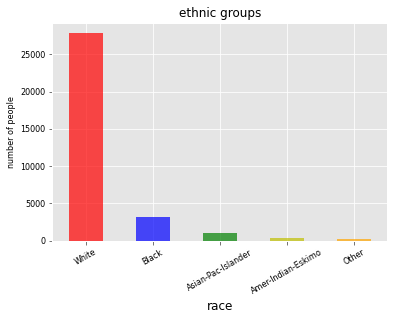

In [6]:
plt.figure(figsize=(6, 4))
race_count.plot(kind='bar', color=['r', 'b', 'g', 'y', 'orange'], alpha=0.7)
plt.title('ethnic groups', fontsize=12)
plt.xlabel('race', color='black')
plt.ylabel('number of people', fontsize=8, color='black')
plt.xticks(rotation=30, fontsize=8, color='black')
plt.yticks(fontsize=8, color='black')
plt.show()

### What is the average age of men?

In [7]:
df_male = df[df['sex'] == 'Male']
average_age_men = df_male['age'].mean().round(1)
print(f'Average age of male respondents is {average_age_men} years old.')

Average age of male respondents is 39.4 years old.


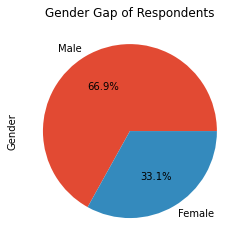

In [8]:
plt.figure(figsize=(8, 4))
df_respondent = df['sex'].value_counts()
df_respondent.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Gap of Respondents', fontsize=12)
plt.ylabel('Gender', color='black', fontsize=10)
plt.show()

### What is the percentage of people who have a Bachelor's degree?

In [9]:

df_bachelors = df[df['education'] == 'Bachelors']
percentage = len(df_bachelors)/len(df)*100
percentage_bachelors = round(percentage, 1)
print(f"The percentage of people who have a bachelor's degree is {percentage_bachelors}%")

The percentage of people who have a bachelor's degree is 16.4%


### What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

##### Dataset 'high education'

In [10]:
high_education = df[(df['education']=='Bachelors')|(df['education']=='Masters')|(df['education']=='Doctorate')]
high_education.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


##### Result

In [11]:
df_high_rich = high_education[high_education['salary'] == '>50K']
higher_education = len(df_high_rich)/len(high_education)*100
higher_education_rich = round(higher_education, 1)
print(f'The percentage of people with advanced education who make >50K is {higher_education_rich}%')

The percentage of people with advanced education who make >50K is 46.5%


### What percentage of people without advanced education make more than 50K?

##### Dataset 'low-education'

In [12]:
low_education = df[~(df['education']=='Bachelors')&~(df['education']=='Masters')&~(df['education']=='Doctorate')]
low_education.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


##### Result

In [13]:
df_low_rich = low_education[low_education['salary'] == '>50K']
lower_education = len(df_low_rich)/len(low_education)*100
lower_education_rich = round(lower_education, 1)
print(f'The percentage of people without advanced education who make >50K is {lower_education_rich}%')

The percentage of people without advanced education who make >50K is 17.4%


### What is the minimum number of hours a person works per week (hours-per-week feature)?

In [14]:
min_work_hours = df['hours-per-week'].min()
print(f'The minimun number of hours a person works per week is just {min_work_hours} hour!')

The minimun number of hours a person works per week is just 1 hour!


### What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [15]:
min_workers = (df[df['hours-per-week']==1])
min_workers_50K = min_workers[min_workers['salary'] == '>50K']
num_min_workers = len(df[df['hours-per-week']==1])
super_rich = len(min_workers_50K)/num_min_workers*100
rich_percentage = round(super_rich, 1)
print(f'The percentage of people who work the minimum hours/week but earn >50K is {rich_percentage}')

The percentage of people who work the minimum hours/week but earn >50K is 10.0


### What country has the highest percentage of people that earn >50K?

##### Dataset 'base_data' grouped by

In [16]:
base_data = df[['native-country', 'salary']]
base_data_group = base_data.groupby('native-country').count()
base_data_group.sort_values('native-country').head()

,salary
native-country,
?,583
Cambodia,19
Canada,121
China,75
Columbia,59


##### Dataset 'rich_country' grouped by

In [17]:
rich_country = base_data[base_data['salary']== '>50K']
rich_country_group = rich_country.groupby('native-country').count()
rich_country_group.sort_values('native-country').head()


,salary
native-country,
?,146
Cambodia,7
Canada,39
China,20
Columbia,2


##### Merge 'base_data' dataset and 'rich_country' dataset as 'join_data'

In [18]:
join_data = pd.merge(base_data_group, rich_country_group, on='native-country', how='right')
join_data['percentage'] = join_data['salary_y']/join_data['salary_x']*100

join_data['percentage'] = round(join_data['percentage'], 1)
join_data.reset_index(inplace=True)
join_data.drop(0, inplace=True)
join_data.head()


,native-country,salary_x,salary_y,percentage
1,Cambodia,19,7,36.8
2,Canada,121,39,32.2
3,China,75,20,26.7
4,Columbia,59,2,3.4
5,Cuba,95,25,26.3


##### Result 

In [19]:
result = join_data.where(join_data['percentage'] == join_data['percentage'].max()).dropna()

highest_earning_country= result.iloc[0, 0]
highest_earning_country_percentage = result.iloc[0, 3]
print(f'{highest_earning_country} has the highest percentage of people that earn >50K. The percentage is {highest_earning_country_percentage}%')

Iran has the highest percentage of people that earn >50K. The percentage is 41.9%


### Top10 Countries with the highest percentage of people that earn >50K

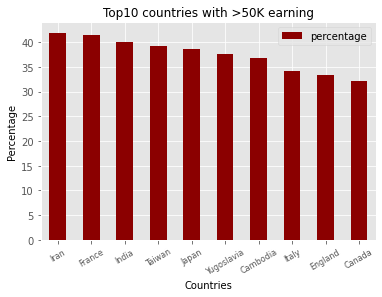

In [22]:
join_data.sort_values('percentage', ascending=False, inplace=True)
join_data.drop(['salary_x', 'salary_y'], axis=1, inplace=True)


join_data.set_index('native-country', inplace=True)
plot_data = join_data.head(10)


plot_data.plot(kind='bar', color='darkred', figsize=(6, 4))
plt.title('Top10 countries with >50K earning', fontsize=12 )
plt.xlabel('Countries', fontsize=10, color='black')
plt.ylabel('Percentage', fontsize=10, color='black')
plt.xticks(rotation=30, fontsize=8)
plt.show()


### Identify the most popular occupation for those who earn >50K in India

In [23]:
india = df[(df['native-country'] =='India')&(df['salary']=='>50K')]
occupation_india =india['occupation'].value_counts(ascending=False).index.values.tolist()
top_IN_occupation = occupation_india[0]
print(f'The most popular occupation with >50K income in India is {top_IN_occupation}')

The most popular occupation with >50K income in India is Prof-specialty
